<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITx%2018.6501x/Notebooks/stats_w10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### More with hypothesis tests and modeling

In [ ]:
library(tidyverse)

In [ ]:
df <- read_csv('GRADES.csv')

Rows: 78 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): ID, GPA, IQ, Gender, SelfConcept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(df)

ID,GPA,IQ,Gender,SelfConcept
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.940,111,2,67
2,8.292,107,2,43
3,4.643,100,2,52
4,7.470,107,2,66
5,8.882,114,1,58
6,7.585,115,2,51


What hypothesis tests are possible with the data?  List out different ideas and perform these tests, clearly stating the null hypothesis.

In [ ]:
t.test(GPA ~ Gender, data = df)


	Welch Two Sample t-test

data:  GPA by Gender
t = 0.90553, df = 74.862, p-value = 0.3681
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -0.4978876  1.3277078
sample estimates:
mean in group 1 mean in group 2 
       7.696548        7.281638 


In [ ]:
lm_model <- lm(GPA ~ IQ + factor(Gender), data = df)
summary(lm_model)


Call:
lm(formula = GPA ~ IQ + factor(Gender), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8927 -0.7413  0.2966  0.9560  3.2512 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.72842    1.49735  -2.490   0.0150 *  
IQ               0.10795    0.01389   7.770 3.26e-11 ***
factor(Gender)2 -0.96746    0.37150  -2.604   0.0111 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.576 on 75 degrees of freedom
Multiple R-squared:  0.4512,	Adjusted R-squared:  0.4366 
F-statistic: 30.84 on 2 and 75 DF,  p-value: 1.686e-10


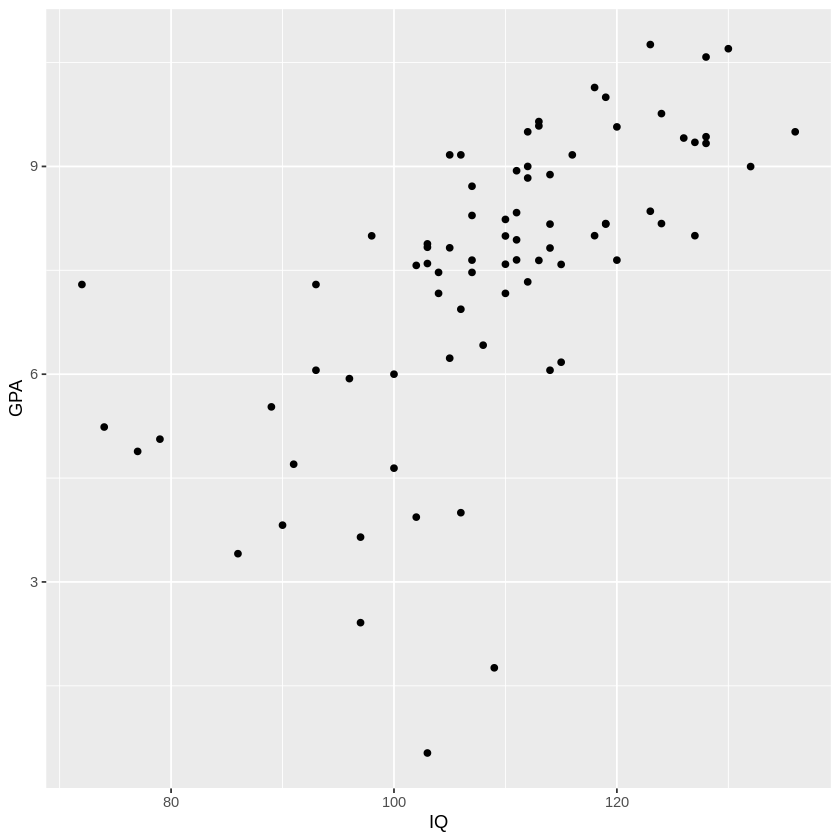

In [ ]:
ggplot(df, aes(x = IQ, y = GPA)) +
  geom_point()

In [ ]:
t.test(SelfConcept ~ Gender, data = df, var.equal = FALSE)


	Welch Two Sample t-test

data:  SelfConcept by Gender
t = -0.82764, df = 62.784, p-value = 0.411
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -8.191000  3.393471
sample estimates:
mean in group 1 mean in group 2 
       55.51613        57.91489 


In [ ]:
t.test(GPA ~ Gender, data = df, alternative = 'greater')


	Welch Two Sample t-test

data:  GPA by Gender
t = 0.90553, df = 74.862, p-value = 0.184
alternative hypothesis: true difference in means between group 1 and group 2 is greater than 0
95 percent confidence interval:
 -0.3481962        Inf
sample estimates:
mean in group 1 mean in group 2 
       7.696548        7.281638 


#### Predicting Dropout

Below, a dataset containing information on college dropouts is loaded and displayed.  Your goal is to predict whether or a student will dropout or graduate.  First, you will use logistic regression and interpret the results of hypothesis tests on the coefficients.  Next, you will use `carat` to build a model that is most accurate.

In [ ]:
dropout <- read.csv('college_dropout.csv', sep = ';')

In [ ]:
head(dropout)

,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance.,Previous.qualification,Previous.qualification..grade.,Nacionality,Mother.s.qualification,Father.s.qualification,⋯,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,1,17,5,171,1,1,122.0,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
2,1,15,1,9254,1,1,160.0,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
3,1,1,5,9070,1,1,122.0,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
4,1,17,2,9773,1,1,122.0,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
5,2,39,1,8014,0,1,100.0,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
6,2,39,1,9991,0,19,133.1,1,37,37,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate


In [ ]:
unique(dropout$Target)

[1] "Dropout"  "Graduate" "Enrolled"

In [ ]:
clean_df <- filter(dropout, Target != 'Enrolled')

In [ ]:
# dropout %>%
#   filter(Target != 'Enrolled')

In [ ]:
t.test(GDP ~ Target, data = clean_df)


	Welch Two Sample t-test

data:  GDP by Target
t = -3.0339, df = 3037.6, p-value = 0.002435
alternative hypothesis: true difference in means between group Dropout and group Graduate is not equal to 0
95 percent confidence interval:
 -0.3830777 -0.0823062
sample estimates:
 mean in group Dropout mean in group Graduate 
           -0.15085855             0.08183341 


In [ ]:
clean_df$num_target <- ifelse(clean_df$Target == 'Dropout', 1, 0)

In [ ]:
model1 <- glm(num_target ~ GDP, data = clean_df, family = 'binomial')

In [ ]:
summary(model1)


Call:
glm(formula = num_target ~ GDP, family = "binomial", data = clean_df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.44271    0.03406 -12.998  < 2e-16 ***
GDP         -0.04545    0.01502  -3.025  0.00248 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4859.8  on 3629  degrees of freedom
Residual deviance: 4850.7  on 3628  degrees of freedom
AIC: 4854.7

Number of Fisher Scoring iterations: 4


In [ ]:
model2 <- glm(num_target ~ GDP + Daytime.evening.attendance.  + Inflation.rate , data = clean_df, family = 'binomial')
summary(model2)


Call:
glm(formula = num_target ~ GDP + Daytime.evening.attendance. + 
    Inflation.rate, family = "binomial", data = clean_df)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.01619    0.10417  -0.155  0.87648    
GDP                         -0.04278    0.01521  -2.813  0.00491 ** 
Daytime.evening.attendance. -0.53018    0.10563  -5.019 5.19e-07 ***
Inflation.rate               0.03384    0.02469   1.371  0.17044    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4859.8  on 3629  degrees of freedom
Residual deviance: 4823.5  on 3626  degrees of freedom
AIC: 4831.5

Number of Fisher Scoring iterations: 4
